# Community Software Analysis Scikit-Learn

In [5]:
import sklearn
import numpy as np
import scipy
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import SGDRegressor
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_digits

### What I've Learned

Scikit-Learn is a machine learning library for python. This library uses a lot of methods we have used in class. It has algorithms that use graident descent, it has multiple regression algorithm, It has spline and polynomial interpolation functions in it's preprocessing module, it include SVD, QR-factorization, and the gram schmidt method in it's decompostion module, and a lot of algorithms that use linear algebra topics covered in class for example Principle Component Analysis, Partial Least sqaure Regression, and multidimension scaling.

#### Spline Interpolation

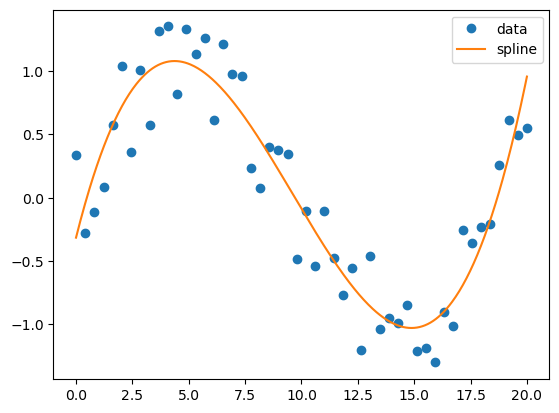

In [6]:
x = np.linspace(0, 20, num=50, endpoint=True)
y = np.sin(x/3)
for i in range(len(y)):
    y[i] += random.uniform(-0.5, 0.5)

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(x.reshape(-1, 1))

lin_reg = LinearRegression()

lin_reg.fit(X_poly, y)

x_new = np.linspace(0, 20, num=501, endpoint=True)
X_new_poly = poly.transform(x_new.reshape(-1, 1))
y_new = lin_reg.predict(X_new_poly)

plt.plot(x, y, 'o', x_new, y_new, '-')
plt.legend(['data', 'spline'], loc='best')
plt.show()

##### Stohcastic Gradient Descent

Using stochastic gradient descent to fit a linear regression 

Intercept: [4.04103654]
Coefficient: [2.61091149]


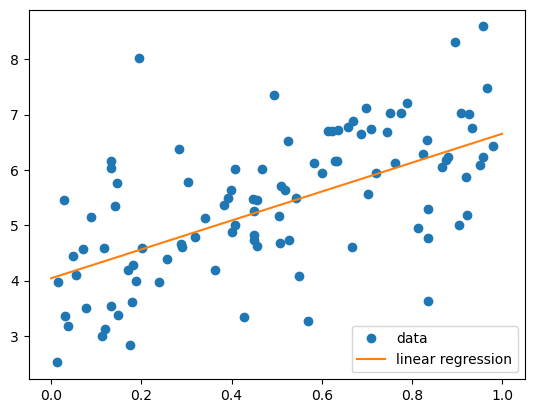

In [7]:
np.random.seed(40)
X = np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

sgd_reg = SGDRegressor(max_iter=100, eta0=0.1, penalty=None, random_state=42)

sgd_reg.fit(X, y.ravel())

print("Intercept:", sgd_reg.intercept_)
print("Coefficient:", sgd_reg.coef_)

X_new = np.linspace(0, 1, num=100).reshape(-1, 1)
y_new = sgd_reg.predict(X_new)

plt.plot(X, y, 'o')
plt.plot(X_new, y_new, '-')
plt.legend(['data', 'linear regression'], loc='best')
plt.show()

#### Singular Value Decomposition

SVD implementation to perform dimensionality reduction for input to ML algorithm that does image regonition. It is reducing the dimensions of an input from 64 to 2 which may not be the best choice but is for visual representation.

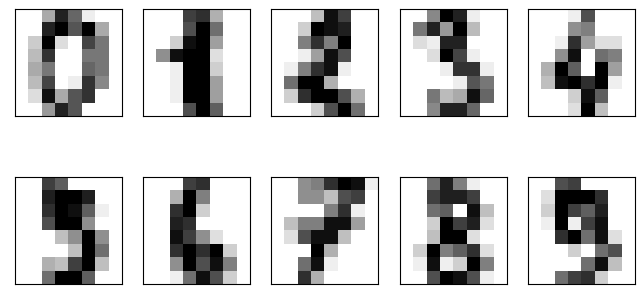

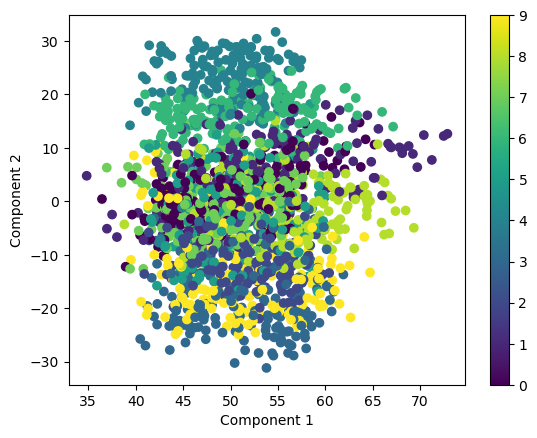

In [8]:
digits = load_digits()

fig, ax = plt.subplots(2, 5, figsize=(8, 4))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])
plt.show()

svd = TruncatedSVD(n_components=2)

X_svd = svd.fit_transform(digits.data)

plt.scatter(X_svd[:, 0], X_svd[:, 1], c=digits.target)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()
plt.show()